<a href="https://colab.research.google.com/github/siddadel/kalidas/blob/main/Visualize_Clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
root = '/content/drive/MyDrive/ANLP21/'
out = root+"out-post-PCA/"

In [ ]:
import pandas as pd
import random
import os
import re
import spacy
from collections import Counter
from joblib import Parallel, delayed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
nlp = spacy.load("en_core_web_sm")
inference_df = pd.read_csv(root+"concatenated-all-characters.csv")
inference_df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,film,scene,item_ids,item,character,protagonist,xAttr,MotivatedByGoal,xReact
0,10,705912,705912,10_things_i_hate_about_you.txt,1,11,"RIDER says, ""Hey -- sorry.""",RIDER,KAT,"[' apologetic', ' remorseful', ' sorry', ' sor...","[' ', ' sorry', ' they are sorry', ' none...","[' sorry', ' relieved', ' sad', ' good', ' hap..."
1,12,705914,705914,10_things_i_hate_about_you.txt,1,13,"KAT says, ""Leave it""",KAT,KAT,"[' independent', ' decisive', ' mean', ' deter...","[' KAT LEAVES IT.', ' KAT LEAVES IT', ' KAT LE...","[' good.', ' satisfied', ' relieved', ' happy'..."
2,18,705920,705920,10_things_i_hate_about_you.txt,2,3,"BIANCA says, ""Did you change your hair?""",BIANCA,KAT,"[' curious', ' fashionable', ' confident', ' m...","[' PersonY looks at PersonY', ' PersonX looks ...","[' happy.', ' happy', ' curious', ' satisfied'..."
3,19,705921,705921,10_things_i_hate_about_you.txt,2,4,"CHASTITY says, ""No.""",CHASTITY,KAT,"[' decisive', ' determined', ' independent', '...","[' CHASTITY DOES NOT KNOW', ' ', ' CHASTITY'...","[' good.', ' satisfied', ' happy', ' good', ' ..."
4,20,705922,705922,10_things_i_hate_about_you.txt,2,5,"BIANCA says, ""You might wanna think about it""",BIANCA,KAT,"[' considerate', ' thoughtful', ' curious', ' ...","[' PersonY listens to PersonY', ' PersonY thin...","[' good.', ' good', ' informed', ' happy', ' s..."


In [ ]:
import os
def get_file_name(method, fg_type, k, ext=".png"):
  path = out+method+"/"+str(k)+"/"
  flag = os.path.exists(path)
  if not flag:
    os.makedirs(path)
  return "{}{}_{}_{}_{}".format(path,method, str(k),fg_type,ext)

k = 5
method = "tf_idf"
predicted = pd.read_csv(get_file_name(method, "clusters", k, ext="train.csv"))

inference_cluster_df = pd.merge(predicted, inference_df, on=['film','character'])
inference_cluster_df.head()

,Unnamed: 0_x,film,character,cluster,Unnamed: 0_y,Unnamed: 0.1,Unnamed: 0.1.1,scene,item_ids,item,protagonist,xAttr,MotivatedByGoal,xReact
0,0,who_framed_roger_rabbit_who_shot_roger_rabbit.txt,DOOM,4,146,690305,690305,14,25,"DOOM says, ""Is this man removing evidence from...",VALIANT,"[' suspicious', ' mean', ' curious', ' violent...","[' DOOM HAS NO IDEA', ' DOOM HAS TO KNOW', ' ...","[' guilty', ' angry', ' satisfied', ' good', '..."
1,0,who_framed_roger_rabbit_who_shot_roger_rabbit.txt,DOOM,4,148,690307,690307,14,27,"DOOM says, ""I'll take that.""",VALIANT,"[' greedy', ' mean', ' decisive', ' selfish', ...","[' DOOM GETS SOMETHING', ' DOOM GETS THE MONEY...","[' happy.', ' happy', ' satisfied', ' good', '..."
2,0,who_framed_roger_rabbit_who_shot_roger_rabbit.txt,DOOM,4,149,690309,690309,14,29,"DOOM says, ""(continuing) Looks like the deceas...",VALIANT,"[' violent', ' angry', ' mean', ' rude', ' car...","[' the dead person is dead', ' the dead man is...","[' angry', ' guilty', ' sad', ' bad', ' good']"
3,0,who_framed_roger_rabbit_who_shot_roger_rabbit.txt,DOOM,4,151,690312,690312,14,32,"DOOM says, ""Yes, we talked to Mr. Maroon. He ...",VALIANT,"[' angry', ' scared', ' determined', ' mean', ...",[' PersonY asks PersonY if they talked to the ...,"[' happy', ' relieved', ' satisfied', ' good',..."
4,0,who_framed_roger_rabbit_who_shot_roger_rabbit.txt,DOOM,4,154,690316,690316,14,36,"DOOM says, ""The rabbit's movements are fairly ...",VALIANT,"[' sneaky', ' smart', ' clever', ' careful', '...","[' they find the safe', ' the rabbit is caught...","[' happy.', ' accomplished', ' happy', ' relie..."


In [ ]:
film_char_group = inference_cluster_df.groupby(['film','character','cluster'])
df_film_char_embed = []
for film_char, group in film_char_group:
  df_film_char_embed.append({'film':film_char[0], 'character':film_char[1], 'cluster': film_char[2]})
df_film_char_embed = pd.DataFrame(df_film_char_embed)
df_film_char_embed

,film,character,cluster
0,2001_a_space_odyssey.txt,HAL,0
1,a_nightmare_on_elm_street.txt,NANCY,0
2,airplane.txt,ELAINE,0
3,airplane_ii_the_sequel.txt,TED,2
4,aliens.txt,RIPLEY,1
...,...,...,...
173,what_lies_beneath.txt,CLAIRE,1
174,who_framed_roger_rabbit_who_shot_roger_rabbit.txt,DOOM,4
175,who_framed_roger_rabbit_who_shot_roger_rabbit.txt,JESSICA RABBIT,2
176,who_framed_roger_rabbit_who_shot_roger_rabbit.txt,ROGER RABBIT,1


In [ ]:
def register_in_bag(film_char, token, relation):
    if film_char not in film_char_bags:
      film_char_bags[film_char] = {}
    if(relation not in film_char_bags[film_char]):
      film_char_bags[film_char][relation] = Counter()
    film_char_bags[film_char][relation][token]+=1

    vocabulary.add(token)

    if(token not in vocabulary_idf[relation]):
      vocabulary_idf[relation][token] = set()
    vocabulary_idf[relation][token].add(film_char)

import string
  
def process_results(row):
    for relation in relations:
      film_char = "{film}_{char}".format(film = row['film'], char = row['character'])
      results = row[relation].strip('][').split(', ')
      for result in results:
        result = result.translate(str.maketrans('', '', string.punctuation))
        tokens = result.split(' ')
        for token in tokens:
            token = token.replace('\'','').strip()
            if token != "" and token not in nlp.Defaults.stop_words:
              register_in_bag(film_char, token, relation)

relations = [ "xAttr", "xReact"]
vocabulary = set()
vocabulary_idf = {"xAttr": {}, "xReact": {}}

film_char_bags = {}
inference_cluster_df.apply(process_results, axis=1)

import math
def tf_idf(film_char_bags, film_char, relation):
  ret = []
  for token in vocabulary:
    if token in film_char_bags[film_char][relation]:
      f = film_char_bags[film_char][relation][token]
      F = sum(film_char_bags[film_char][relation].values())
      tf = f/F

      N = len(film_char_bags[film_char][relation]) #+ 0.001
      n = len(vocabulary_idf[relation][token]) #+ 0.001
      idf = math.log(N/n) 
      ret.append(tf*idf)
    else:
      ret.append(0)
  return ret


ATTRIBUTES
{'bug': 0.0004701457451810061, 'pest': 0.0004701457451810061, 'talky': 0.0004701457451810061, 'talking': 0.0004701457451810061, 'cheating': 0.0004701457451810061, 'cowardly': 0.0004701457451810061, 'irritated': 0.0004701457451810061, 'threatening': 0.0004701457451810061, 'defensive': 0.0004701457451810061, 'alert': 0.0004701457451810061, 'bully': 0.0004701457451810061, 'ready': 0.0004701457451810061, 'active': 0.0004701457451810061, 'prepared': 0.0004701457451810061, 'stupid': 0.0004701457451810061, 'cigarette': 0.0004701457451810061, 'charitable': 0.0004701457451810061, 'injured': 0.0004701457451810061, 'mosquitos': 0.0004701457451810061, 'unintuitive': 0.0004701457451810061, 'embalmed': 0.0004701457451810061, 'jazz': 0.0004701457451810061, 'monk': 0.0004701457451810061, 'left': 0.0004701457451810061, 'drugged': 0.0004701457451810061, 'expressive': 0.0004701457451810061, 'surfer': 0.0004701457451810061, 'reflective': 0.0004701457451810061, 'sexually': 0.0004701457451810061,

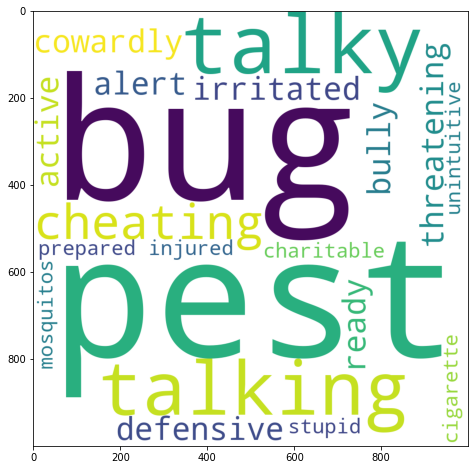

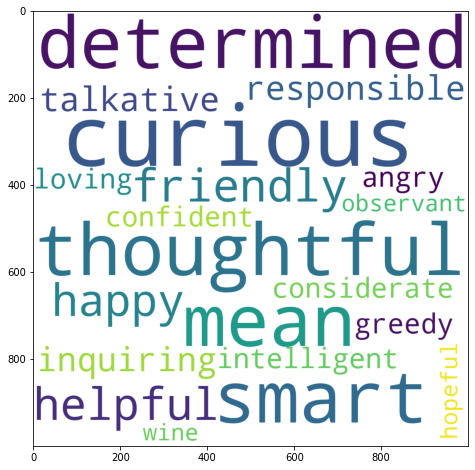

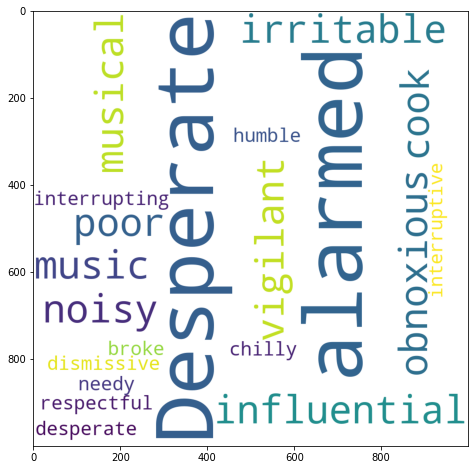

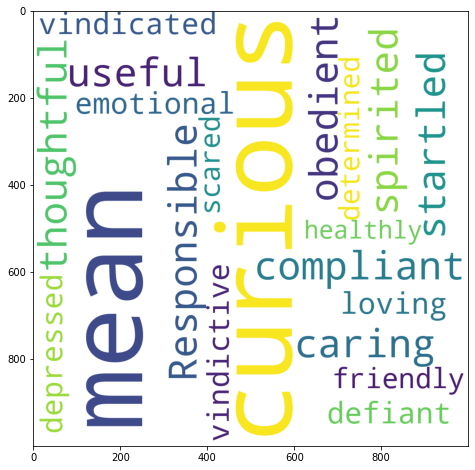

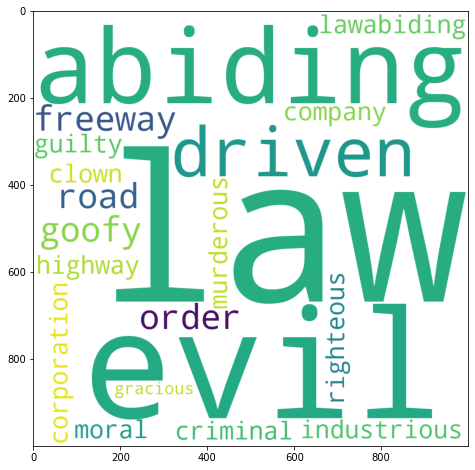

In [ ]:
import math
def get_top_words(film, char, relation):
  film_char = "{film}_{char}".format(film=film, char=char)
  ret = tf_idf(film_char_bags, film_char, relation)
  v_list = list(vocabulary)
  sorted_ret = [(v_list[i], ret[i]) for i in range(len(v_list))]
  sorted_ret.sort(key = lambda x: x[1], reverse=True) 
  return [t[0] for t in sorted_ret]
  
def get_words(df, cluster, relation):
  df = df[df['cluster']==cluster]
  text = ""
  words = []
  for index, row in df.iterrows():
    words.extend(get_top_words(row['film'], row['character'], relation))
  return Counter(words)

def _(relation):
  clusters = []
  vocab = set()
  k=5
  for i in range(0, k):
    words = get_words(inference_cluster_df, i, relation)
    clusters.append(words)
    vocab.update(words)
  
  vocab = set(vocab)
  vocab_idf = {}
  for word in vocab:
    vocab_idf[word] = 0
    for cluster in clusters:
      if word in cluster:
        vocab_idf[word]+=1
  
  tf_id_cluster = []
  for cluster in clusters:
    tf_idf= {}
    tf = Counter(cluster)
    for word in tf:
      t = tf[word]/sum(tf.values())
      tf_idf[word] = t# t*math.log(k/(vocab_idf[word]))
    tf_idf = { word: tf_idf[word] for word in tf_idf if tf_idf[word]!=0}
    print({k: v for k, v in sorted(tf_idf.items(), key=lambda item: item[1], reverse=True)})
    wc = WordCloud(background_color="white",width=1000,height=1000, max_words=20, stopwords = STOPWORDS, relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(tf_idf)
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wc)
     
print("ATTRIBUTES")
_('xAttr')

REACTION
{'charge': 0.0004701457451810061, 'hero': 0.0004701457451810061, 'control': 0.0004701457451810061, 'authoritative': 0.0004701457451810061, 'cigarette': 0.0004701457451810061, 'charitable': 0.0004701457451810061, 'injured': 0.0004701457451810061, 'mosquitos': 0.0004701457451810061, 'unintuitive': 0.0004701457451810061, 'embalmed': 0.0004701457451810061, 'jazz': 0.0004701457451810061, 'monk': 0.0004701457451810061, 'left': 0.0004701457451810061, 'drugged': 0.0004701457451810061, 'expressive': 0.0004701457451810061, 'surfer': 0.0004701457451810061, 'reflective': 0.0004701457451810061, 'sexually': 0.0004701457451810061, 'boat': 0.0004701457451810061, 'book': 0.0004701457451810061, 'bit': 0.0004701457451810061, 'gentlemanlike': 0.0004701457451810061, 'smug': 0.0004701457451810061, 'lie': 0.0004701457451810061, 'special': 0.0004701457451810061, 'eagerness': 0.0004701457451810061, 'ringing': 0.0004701457451810061, 'nasty': 0.0004701457451810061, 'deadbeat': 0.0004701457451810061, 'se

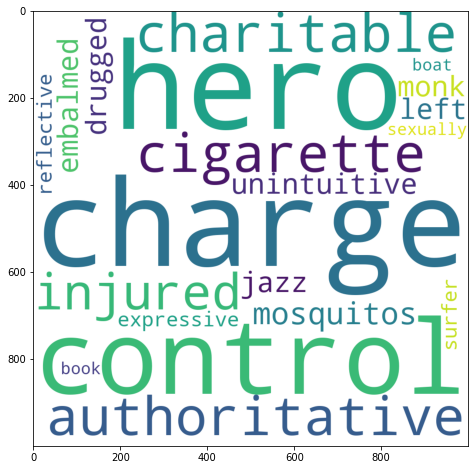

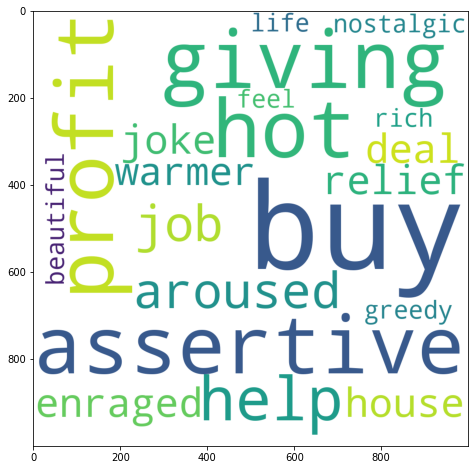

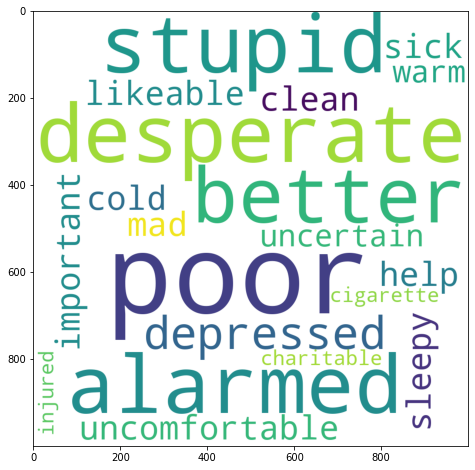

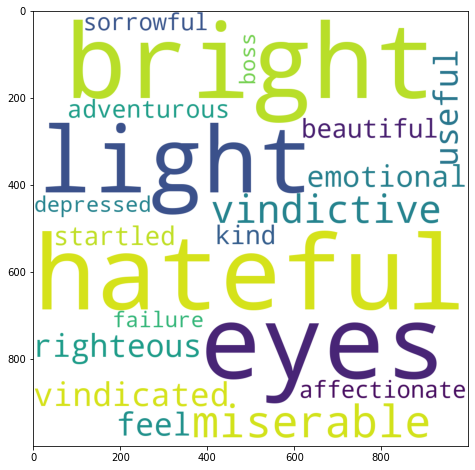

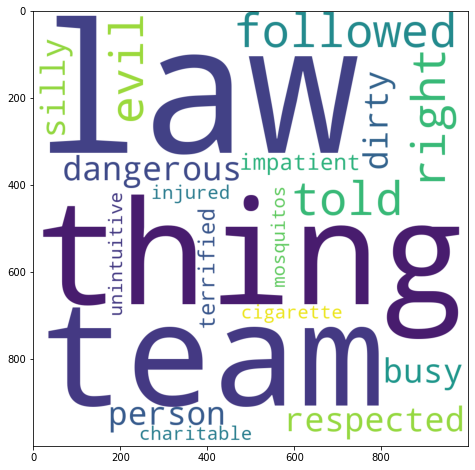

In [ ]:
print('REACTION')
_('xReact')